#Trabajo 0
**Presentado por: Esteban Garcia Solis**

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np;
import pandas as pandas;
from scipy import ndimage
from torchvision import datasets, transforms
from torch.distributions import normal
from torch.distributions import multivariate_normal
import matplotlib.pyplot as plt

**1.a) Generación de conjunto de datos linealmente separables:**
$$\langle X_{a}, T_{a} \rangle$$



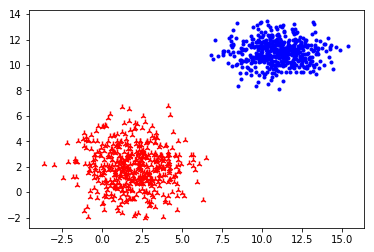

In [2]:
def createData(numberSamples, means = [2.0, 2.0], stds = [2.0, 1.0], targetMultiplier = 1):
    
    means = torch.tensor(means)

    # Ones to concatenate for bias
    ones = torch.ones(numberSamples, 1)
    
    # Covariance matrix creation with identity
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds[0]
    covarianceMatrix[1, 1] = stds[1]

    # Inits the bi gaussian data generator
    multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
    # Takes the samples
    samplesClass = multiGaussGenerator.sample(torch.Size([numberSamples]))
    
    # Concatenates the ones for the bias
    samplesClassBias = torch.cat((ones, samplesClass), 1)
    
    #Create targets
    targets = targetMultiplier * torch.ones(numberSamples, 1)
    
    return (targets, samplesClassBias)
  
numberSamples = 500  

(TaC1, XaC1) = createData(numberSamples, means = [2.0, 2.0], stds = [3.0, 3.0], targetMultiplier = 1)
(TaC2, XaC2) = createData(numberSamples, means = [11.0, 11.0], stds = [2.0, 1.0], targetMultiplier = -1)

Ta = torch.cat((TaC1, TaC2), 0)
Xa = torch.cat((XaC1, XaC2), 0)

plt.scatter(XaC1[:, 1], XaC1[:, 2], color = "red", marker = "2")
plt.scatter(XaC2[:, 1], XaC2[:, 2], color = "blue", marker = ".")
plt.show()

**1.b) Generación de conjunto de datos no linealmente separables:**
$$\langle X_{b}, T_{b} \rangle$$


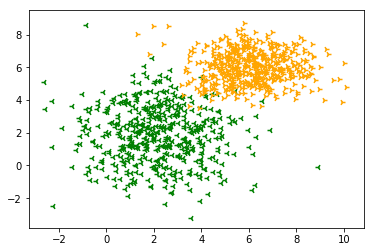

In [3]:
(TbC1, XbC1) = createData(numberSamples, means = [2.0, 2.0], stds = [3.0, 3.0], targetMultiplier = 1)
(TbC2, XbC2) = createData(numberSamples, means = [6.0, 6.0], stds = [2.0, 1.0], targetMultiplier = -1)

Tb = torch.cat((TbC1, TbC2), 0)
Xb = torch.cat((XbC1, XbC2), 0)


plt.scatter(XbC1[:, 1], XbC1[:, 2], color = "green", marker = "3")
plt.scatter(XbC2[:, 1], XbC2[:, 2], color = "orange", marker = "4")
plt.show()

**2) Implementación de la función:**
$$\overrightarrow{w}_{opt} = estimateOptimumW(X,T)$$

In [0]:
def estimateOptimumW(TargetsAll, SamplesAll):
    """ Estimate the optimum W with NO FORS
    param TargetsAll, NumSamples x 1 matrix with target values (1 or -1)
    param SamplesAll, NumSamples x NumDimensions 
    return wOpt, array with optimum weights
    """
    
    pinvSamplesAll = torch.tensor(np.linalg.pinv(SamplesAll.numpy()))
    wOpt = pinvSamplesAll.mm(TargetsAll)
    
    return wOpt

**3) Implementación de la función:**
$$\widetilde{T} = forward(X\overrightarrow{w}_{opt})$$

In [0]:
def forward(SamplesAll, wOpt):
    """
    Get model output, with NO FORS
    param TargetsAll
    return EstimatedTargets, with 1 or -1
    """
    
    EstimatedTargets = SamplesAll.mm(wOpt)
    
    EstimatedTargets[EstimatedTargets >= 0] = 1
    EstimatedTargets[EstimatedTargets < 0]  = -1
    
    return EstimatedTargets

**4) Implementación de la función:**
$$e = evaluateError(T,\widetilde{T})$$

In [0]:
def evaluateError(TargetsAll, EstimatedTargetsAll):
    """
    Evaluate model error using the euclidian distance
    param TargetsAll, real targets
    param EstimatedTargets
    """
    
    error = torch.dist(TargetsAll, EstimatedTargetsAll)    
    
    return error

**5.a) graficación de línea para conjunto de datos Xa**

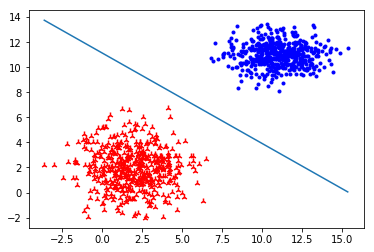

In [7]:
def y(x, wOpt):
    return (-wOpt[0] - x * wOpt[1]) / wOpt[2]
  
wOpta = estimateOptimumW(Ta, Xa)

xMin = Xa[:,1].min()
xMax = Xa[:,1].max()

plt.scatter(XaC1[:, 1], XaC1[:, 2], color = "red", marker = "2")
plt.scatter(XaC2[:, 1], XaC2[:, 2], color = "blue", marker = ".")
plt.plot([xMin,xMax], [y(xMin, wOpta), y(xMax, wOpta)])


**5.b) graficación de línea para conjunto de datos Xb**

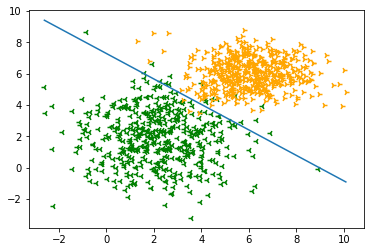

In [8]:
wOptb = estimateOptimumW(Tb, Xb)

xMin = Xb[:,1].min()
xMax = Xb[:,1].max()

plt.scatter(XbC1[:, 1], XbC1[:, 2], color = "green", marker = "3")
plt.scatter(XbC2[:, 1], XbC2[:, 2], color = "orange", marker = "4")
plt.plot([xMin,xMax], [y(xMin, wOptb), y(xMax, wOptb)])

**5.c) Error reportado para los conjuntos de datos Xa y Xb**

In [9]:
estimated_a = estimatedTargets = forward(Xa, wOpta)
error_a = evaluateError(Ta, estimatedTargets)

estimated_b = estimatedTargets = forward(Xb, wOptb)
error_b = evaluateError(Tb, estimatedTargets)

print("Error Xa:", float(error_a))
print("Error Xb:", float(error_b))

Error Xa: 0.0
Error Xb: 8.9442720413208
